## Utility Functions

It is good practice to keep your utility functions (functions that perform certain operations) separate from your machine learning pipeline. This helps you:

1. Focus on each operation/functionality on its own
2. Better trace code when something breaks
3. Perform unit testing

In [71]:
### All imports we will need
import numpy as np
import cv2
import math
import glob
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# use interactive plots
%matplotlib notebook qt

UsageError: unrecognized arguments: qt


In [ ]:
#### set debug to false when imported from another 

## Data Preprocessing Utilities
Functions that implement the preprocessing operations

In [3]:
def preprocess(img):
    # Preprocess the given image img.
    
    # [1] TODO: Convert the image to grayscale (~1 line)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Hint: Check the function cvtColor in opencv.

    # [2] TODO: Blur the image to remove the noise (apply a 3x3 filter) (~1 line)
    blur = cv2.blur(gray,(3,3))

    # Hint: Check the function blur in opencv.
    # Hint: Pass the kernel size as an array (3, 3)

    # [3] TODO: Convert the grayscale image to a binary image. Apply a threshold between 50 and 255 on the blurred image.
    #       The pixels having values less than 50 will be considered 0, and 255 otherwise. (~1 line)
    ret,thresh = cv2.threshold(blur,50,255,cv2.THRESH_BINARY)
    # Hint: Check the function threshold in opencv.
    # Hint: Use the type cv2.THRESH_BINARY with the type parameter.
    # Hint: This function has two return parameters. You can ignore the first one, and the second is the binary image.
    # Example: _, thresholded_img = cv2.threshold(....)

    thresholded_img = thresh
    return thresholded_img

In [4]:
#IN_DEBUG = True ## uncomment this line when you need to test your code, then re-comment it when done

if IN_DEBUG:
    ### test your implementation
    ######## DO NOT CHANGE THIS CODE ########
    img = cv2.imread('images/rectangle/rec1.png')
    thresholded_img = preprocess(img)
    assert np.all((thresholded_img==255) | (thresholded_img==0)), \
        'Preprocessing is incomplete: the resulting final image should be all 0 or 255'

## Feature Extraction Utilities
Functions that implement feature extractors

In [41]:
def findContourArea(img):
    # This function finds the contours of a given image and returns it in the variable contours.
    ## understand contours: 
    ### Contours can be explained simply as a curve joining all the continuous points (along the boundary), having same color or intensity. 
    ### The contours are a useful tool for shape analysis and object detection and recognition.

    # NOTE: This function will not work correctly unless you preprocess the image properly as indicated.
    contours, hierarchy = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    ## the function findContours returns an array of contours and their hierarchy,
    ## Contours is a Python list of all the contours in the image. Each individual contour is a Numpy array of (x,y) coordinates of boundary points of the object.
    ## the list is sorted in terms of hierarchy, this means the outmost contour is in contours[0], 
    ## and their direct inner contours are in contours[1] and so on and so forth
    
    # [4] TODO: Find the contour area of the given image (img) (~1 line)
    area =cv2.contourArea(contours[1])
    # Hint: check the function contourArea in opencv.
    # Hint: think which contour should be passed as argument to the function (which contour we should calculate its area)

    return area, contours

In [32]:
#from cv2 import minAreaRect


def findBoundingRectangleArea(img, contours):
    # This function tries to fit the minimum bounding rectangle for the given contours.

    # [5] TODO: Find the minimum bounding rectangle that can fit the given contours.
    # Hint: Check the function boundingRect in opencv
    x,y,w,h = cv2.boundingRect(contours[1])
    # retval =  minAreaRect(contours[1])
    # print(retval)
    # TODO (Optional): You can uncomment the following lines to show or display the bounded rectangle.
    bounding_rectangle = None
    # bounding_rectangle = cv2.rectangle(img.copy(), (x, y), (x + w, y + h), (0, 255, 0), 2)
    if bounding_rectangle: ## not none
        cv2.imshow('Image_Rec', bounding_rectangle)
        cv2.waitKey(0)

    # [6] TODO: Find the area of the bounding rectangle
    area = w*h
    return area, bounding_rectangle

In [38]:
from cv2 import minEnclosingCircle


def findBoundingCircleArea(img, contours):
    # This function tries to fit the minimum bounding circle for the given contours.

    # [7] TODO: Find the minimum enclosing circle that can fit the given contours.
    # Hint: Check the function minEnclosingCircle in opencv
    center, radius=minEnclosingCircle(contours[1])

    # TODO (Optional): You can uncomment the following lines to show or display the bounded circle.
    bounding_circle = None
    # bounding_circle = cv2.circle(img.copy(), center, radius, (0, 255, 0), 2)
    if bounding_circle: ## not none
        cv2.imshow('Image_Circle', bounding_circle)
        cv2.waitKey(0)

    # [8] TODO: Find the area of the bounding circle
    area = math.pi*int(radius)*int(radius)
    return area, bounding_circle

In [34]:
from cv2 import minEnclosingTriangle


def findBoundingTriangleArea(img, contours):
    # This function tries to fit the minimum bounding triangle for the given contours.

    # [9] TODO: Find the minimum enclosing triangle that can fit the given contours.
    # Hint: Check the function minEnclosingTriangle in opencv and place its output in the variable x
    retval, triangle =minEnclosingTriangle(contours[1])

    # TODO (Optional): You can uncomment the following lines to show or display the bounded triangle.
    bounding_triangle = None
    # bounding_triangle = cv2.polylines(img.copy(), np.int32([x[1]]), True, (0, 255, 0), 2)
    if bounding_triangle: ## not none
        cv2.imshow('Image_Triangle', bounding_triangle)
        cv2.waitKey(0)

    # [10] TODO: Find the area of the bounding circle
    area = retval
    return area, bounding_triangle

In [43]:
#IN_DEBUG = True ## uncomment this line when you need to test your code, then re-comment it when done

if IN_DEBUG:
    ### test your implementation
    ######## DO NOT CHANGE THIS CODE ########
    img = cv2.imread('images/rectangle/rec1.png')
    thresholded_img = preprocess(img) ### assuming this function is behaving correctly
    img_area, img_contours = findContourArea(thresholded_img)
    rect_area, _ = findBoundingRectangleArea(thresholded_img, img_contours)
    circ_area, _ = findBoundingCircleArea(thresholded_img, img_contours)
    tri_area, _ = findBoundingTriangleArea(thresholded_img, img_contours)
    
    assert round(img_area, 2)==14150.5,\
        f'findContourArea() is incorrect, expected {14150.5} found {area}'
    assert round(rect_area, 2)==16120.0, \
        f'findBoundingRectangleArea() is incorrect, expected {16120.0} found {area}'
    assert round(circ_area, 2)==23235.22, \
        f'findBoundingCircleArea() is incorrect, expected {23235.22} found {area}'
    assert round(tri_area,2)==25933.5, \
        f'findBoundingTriangleArea() is incorrect, expected {25933.5} found {area}'

In [46]:
def extract_features(img, class_number=None):
    # Given an image img, extract the following features.
    # 1. The ratio between the figure area and the minimum enclosing rectangle.
    # 2. The ratio between the figure area and the minimum enclosing circle.
    # 3. The ratio between the figure area and the minimum enclosing triangle.

    area, contours = findContourArea(img)
    area1, _ = findBoundingRectangleArea(img, contours)
    area2, _ = findBoundingCircleArea(img, contours)
    area3, _ = findBoundingTriangleArea(img, contours)

    features = []
    if class_number:
        features.append(class_number)
    features.append(area/area1)
    features.append(area/area2)
    features.append(area/area3)
    # [11] TODO: Extract the features and append the class_number (if given) in the beginning of each feature vector.
    return features


In [47]:
#IN_DEBUG = True ## uncomment this line when you need to test your code, then re-comment it when done

if IN_DEBUG:
    ### test your implementation
    ######## DO NOT CHANGE THIS CODE ########
    expected_features = np.array([1.0, 0.88, 0.61, 0.55])
    results = np.array(extract_features(thresholded_img, 1))
    results = np.round(results, 2)
    assert np.all(results == expected_features), \
        f'extract_features() is incorrect'

## Data Plotting Utilities
Functions that implement 3D plots to visualize data

In [57]:
def plot(x, y, z, title='', xlabel='', ylabel='', zlabel='', color_style_str='', label_str='', figure=None, axis=None):
    # [12] TODO: Add title, x_label, y_label, z_label to axis (~4 lines)
    axis.set_title(title)
    axis.set_xlabel(xlabel)
    axis.set_ylabel(ylabel)
    axis.set_zlabel(zlabel)

    # [13] TODO: Scatter plot of data points with coordinates (x, y, z) with the corresponding color and label (~1 line)
    axis.scatter3D(x,y,z, c=color_style_str,label=label_str) 

    handles, labels = axis.get_legend_handles_labels()

    unique = list(set(labels))
    handles = [handles[labels.index(u)] for u in unique]
    labels = [labels[labels.index(u)] for u in unique]

    axis.legend(handles, labels)

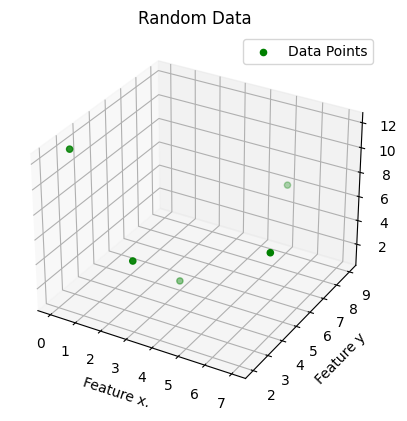

In [77]:
#IN_DEBUG = True ## uncomment this line when you need to test your code, then re-comment it when done

if IN_DEBUG:    
    ### test your implementation
    ######## DO NOT CHANGE THIS CODE ########
    np.random.seed(0)
    x = np.random.randint(10, size=5)
    y = np.random.randint(15, size=5)
    z = np.random.randint(20, size=5)
    fig = plt.figure()
    ax=plt.axes(projection='3d')
    # ax = fig.add_subplot('111', projection='3d')
    plot(x, y, z, title='Random Data',
               xlabel='Feature x.', ylabel='Feature y', zlabel='Feature z.', color_style_str='g',
               label_str="Data Points",
               figure=fig, axis=ax)
    plt.show()

**EXPECTED PLOT**
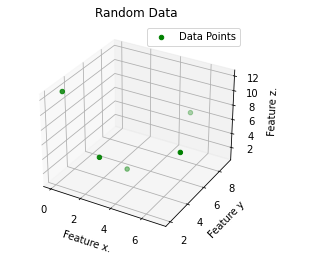

## Classifiers Utilities
Functions that implement the classification algorithms

In [78]:
def calculateDistance(x1, x2):
    # [14] TODO: Calculate the Euclidean distance between the two vectors x1 and x2. (~ 1 line)
    distance = np.sqrt(np.sum(np.square(x1 - x2)))
    return distance

In [ ]:
def MinimumDistanceClassifier(test_point, training_points):
    # [15] TODO: Implement the minumum distance classifier.
    #  You have to classify the test_point whether it belongs to class 1, 2 or 3.
    class_1=[]
    count1=0
    class_2=[]
    count2=0
    class_3=[]
    count3=0
    for i in range(len(training_points)):
        if(training_points[i][0]==1):
            class_1+=training_points[i,1:]
            count1=count1+1
        elif(training_points[i][0]==2):
            class_2+=training_points[i,1:]
            count2+=1
        elif(training_points[i][0]==3):
            class_3+=training_points[i,1:]
            count3+=1
    m_1=class_1/count1
    m_2=class_2/count2
    m_3=class_3/count3
    dis=[]
    dis.append(calculateDistance(test_point,m_1))
    dis.append(calculateDistance(test_point,m_2))
    dis.append(calculateDistance(test_point,m_3))
    classification = np.argmin(dis)+1
    return classification

In [ ]:
def NearestNeighbor(test_point, all_points):
    # [16] TODO: Implement the Nearest Neighbour classifier.
    #  You have to classify the test_point whether it belongs to class 1, 2 or 3.
    classification = 0
    return classification

In [ ]:
def KNN(test_point, all_points, k):
    # [17] TODO: Implement the K-Nearest Neighbour classifier.
    #  You have to classify the test_point whether it belongs to class 1, 2 or 3.
    classification = 0
    return classification

## Model Testing Utilities
Functions that help in the classification algorithms' testing

In [ ]:
def get_class_from_file_name(file_name):
    return file_name.split("test\\")[1].split(".")[0]


def get_class_name(class_number):
    classes = ["", "Rectangle", "Circle", "Triangle"]
    return classes[int(class_number)]